Affine coordinate space has parrallel lines eg. cartesian coordinate space

In [4]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import glob
from pylab import rcParams
rcParams['figure.figsize'] = 25, 15
from scipy.ndimage import measurements
import matplotlib.cm as cm
from pcaRotate import *
imgPaths = glob.glob("/home/msmith/kaggle/whale/imgs/*/l_*")

Image moments by $$M_{ij} = \Sigma_x \Sigma_y x^{i} y^{j} f(x,y)$$
Centroid $$\bar{x} = M_{10}/M_{00}, \bar{y} = M_{01}/M_{00}$$

Central moments = $$ \Sigma_x \Sigma_y (x-\bar{x})^{i} (y-\bar{y})^{j} f(x,y) $$

To be rotated by -144.21 about (1826, 683)


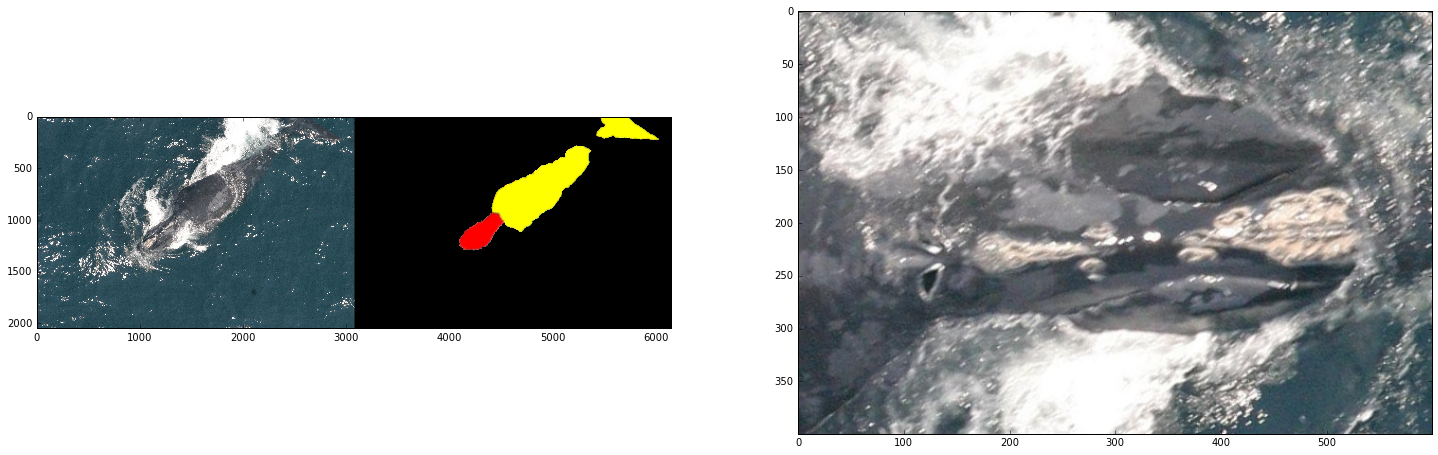

To be rotated by 11.64 about (1457, 550)


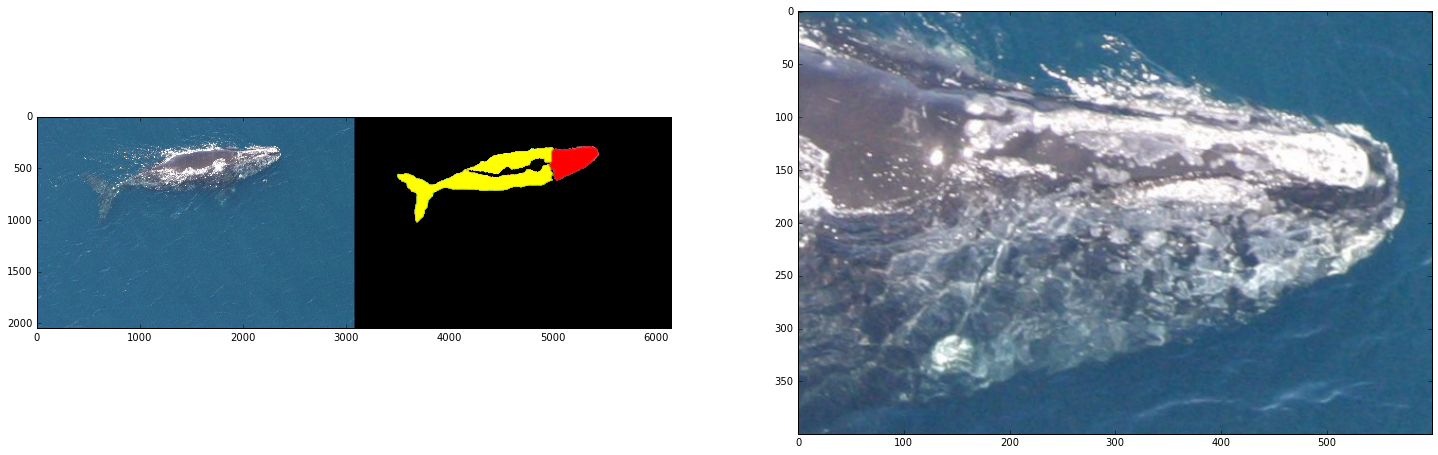

To be rotated by 87.86 about (2323, 1718)


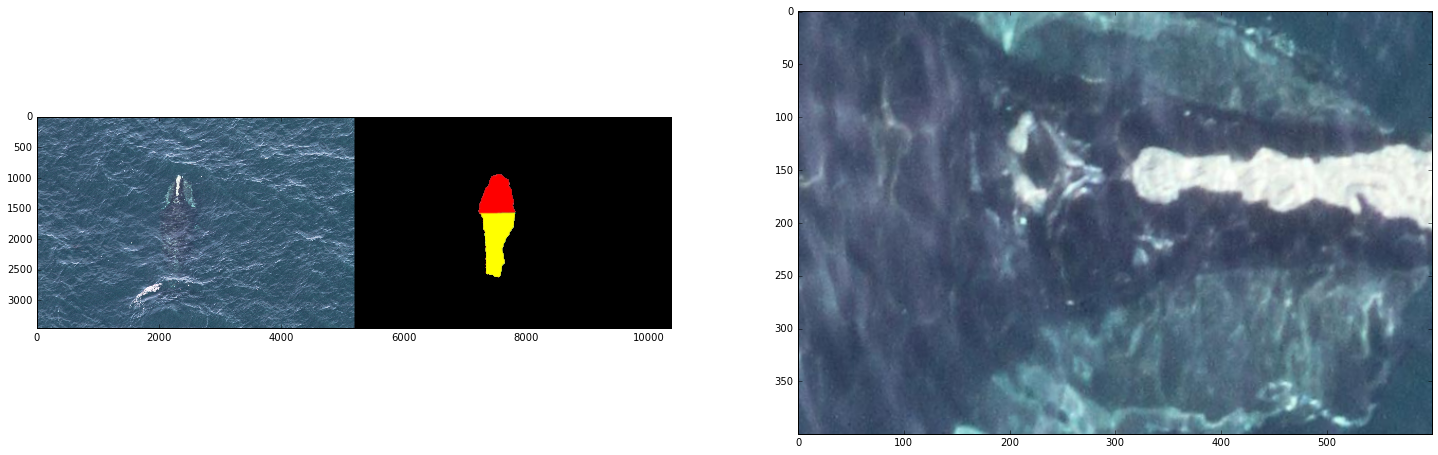

To be rotated by -113.25 about (1283, 1139)


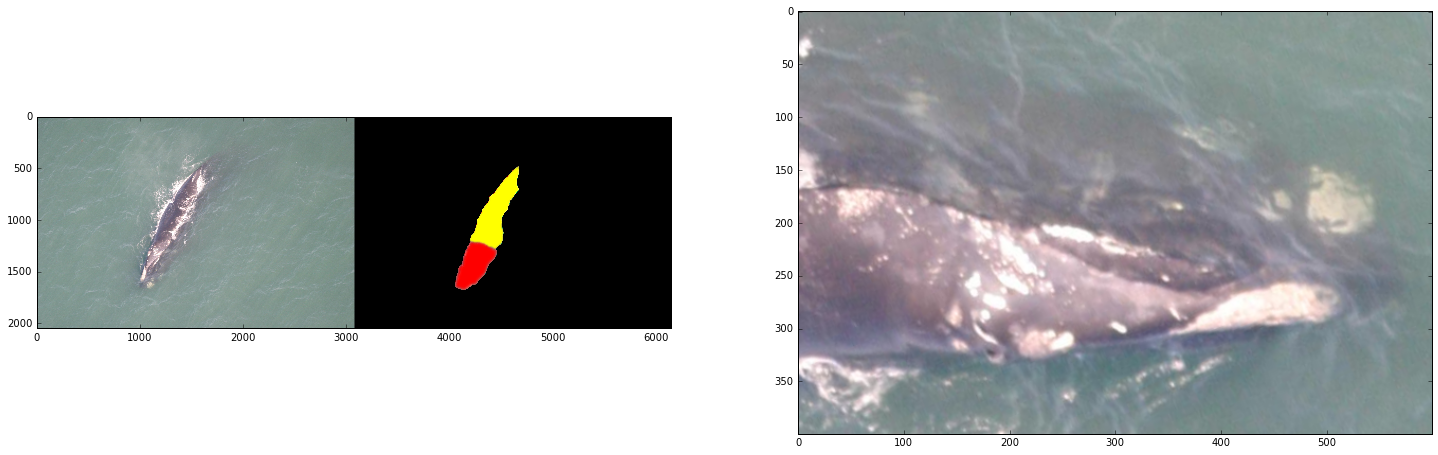

To be rotated by 156.25 about (2024, 1131)


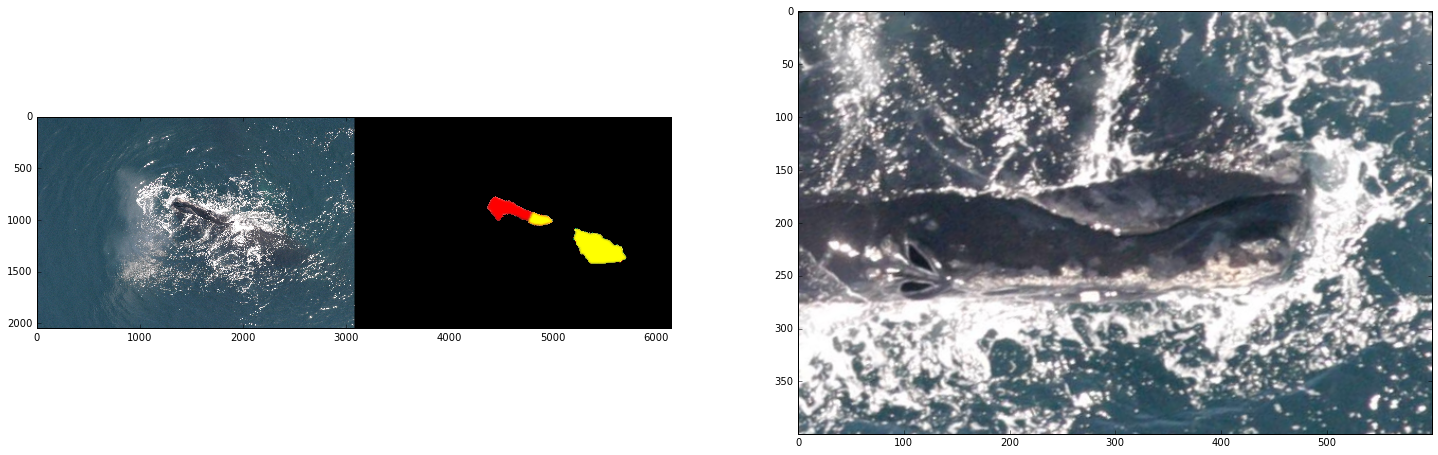

In [2]:
for i in np.random.permutation(len(imgPaths))[:5]:
    imPath = imgPaths[i]
    orig = cv2.imread(imPath.replace("l_","w1_"))[:,:,::-1]
    mask = cv2.imread(imPath)[:,:,::-1]
    h = main(orig,mask,outputSize=(300,200))
    plt.subplot(121)
    plt.imshow(np.hstack((orig,mask)))
    plt.subplot(122)
    plt.imshow(h)
    plt.show()

MORE DETAIL

To be rotated by 64.35 about (1270, 1291)


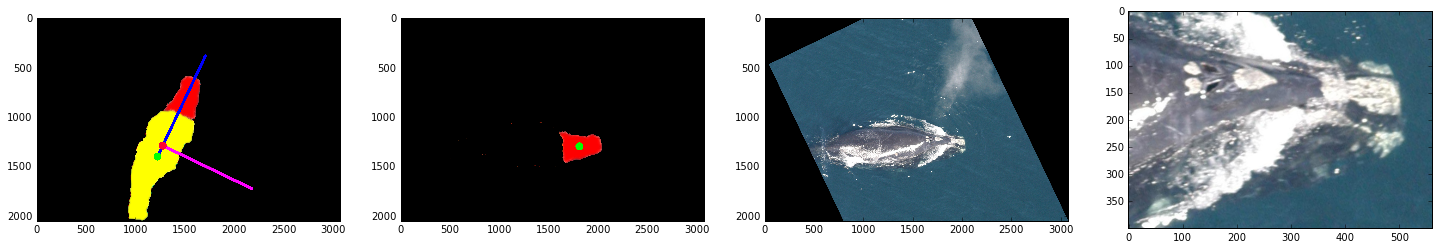

To be rotated by 64.19 about (1147, 1335)


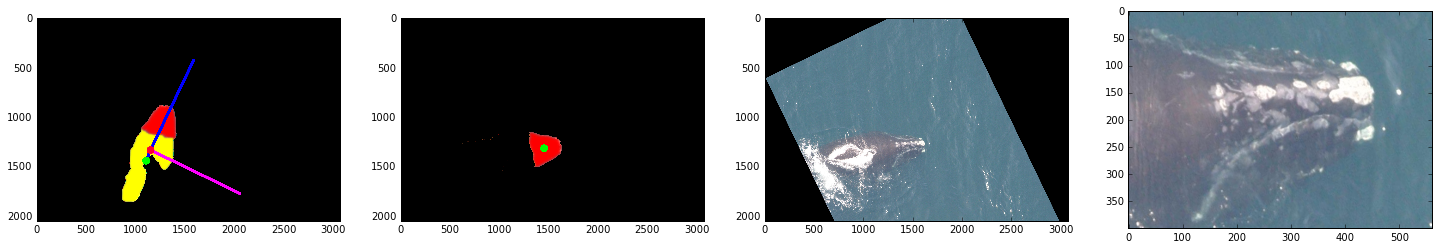

To be rotated by 30.28 about (2109, 1839)


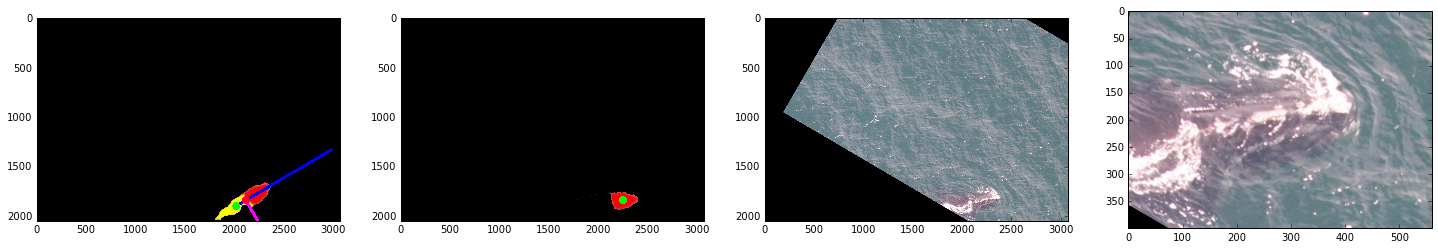

To be rotated by 62.68 about (1399, 1333)


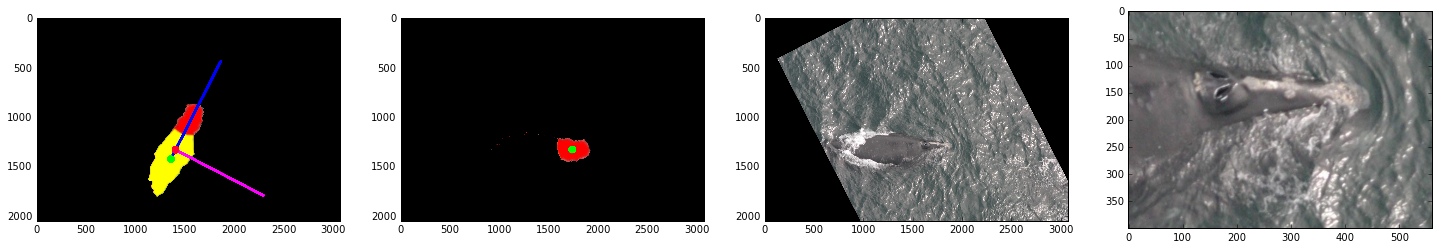

To be rotated by -106.92 about (1698, 406)


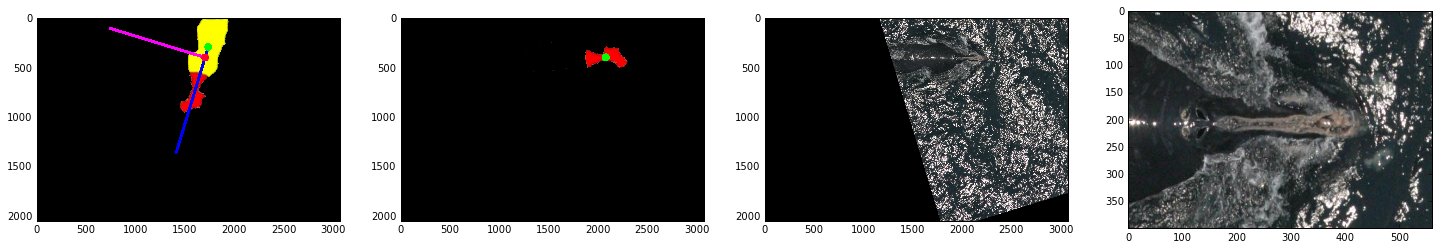

To be rotated by 142.89 about (1772, 1399)


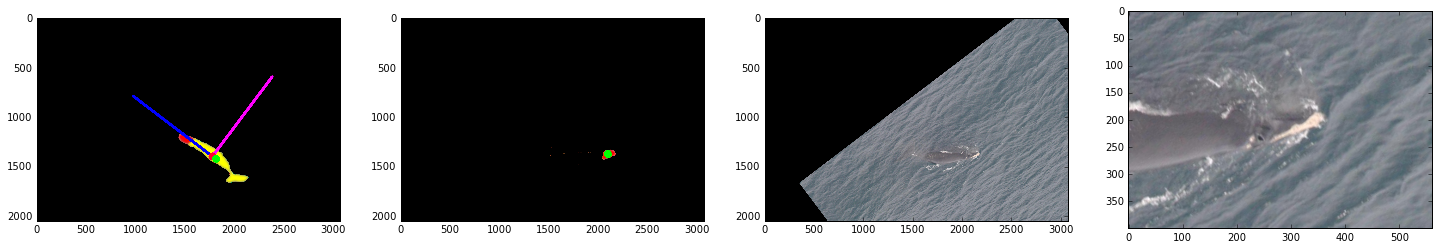

To be rotated by 48.78 about (2084, 1888)


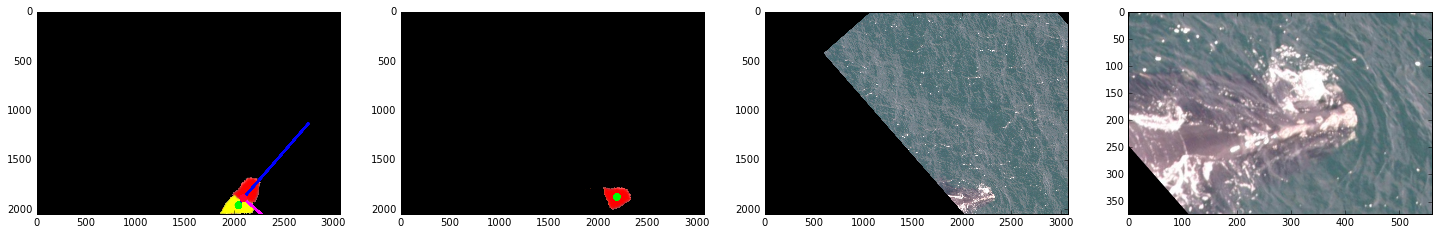

To be rotated by -177.63 about (1865, 881)


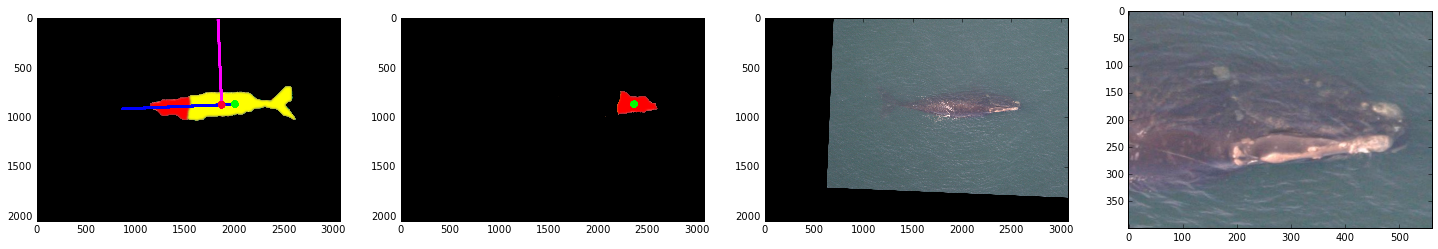

To be rotated by 63.07 about (1474, 1441)


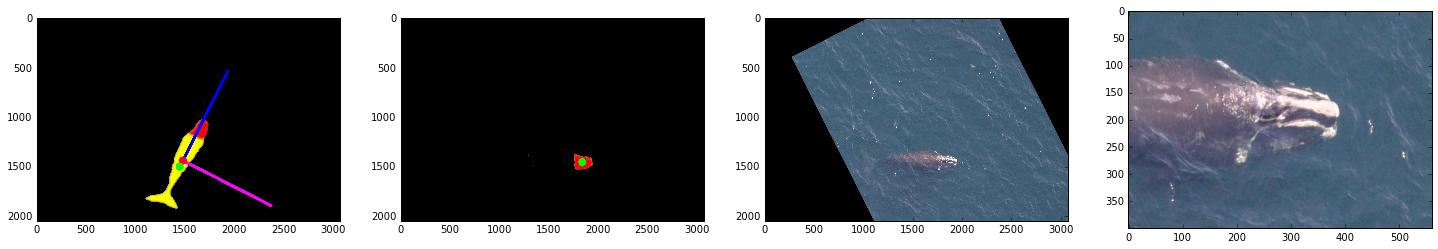

To be rotated by 159.21 about (1588, 884)


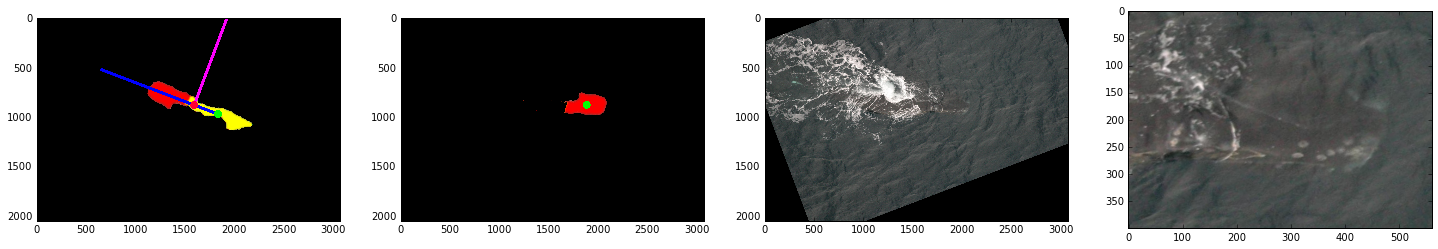

In [5]:
for i in np.random.permutation(len(imgPaths))[:10]:

    imPath = imgPaths[i]

    orig = cv2.imread(imPath.replace("l_","w1_"))[:,:,::-1]
    mask = cv2.imread(imPath)[:,:,::-1]
    h,w,c = mask.shape
    channel = 0 #Red
    
    # Call fns
    mask = getRedYellow(mask)
    centroidR, covR = getImgMoments(mask,0)
    centroidG, covG = getImgMoments(mask,1)
    e1,e2 = evs = getEigenVectors(centroid1=centroidG,centroid2=centroidR,cov=covR)
    
    rotOrig = orig.copy()
    rotMask = mask.copy()
    rotOrig, rotMask = rotate(rotOrig,rotMask,evs,centroidR)
    rotMask = getRed(rotMask)
    
    centroidRotRed, _ = getImgMoments(rotMask,0) #Redo centroid to crop head 
    w = np.array([280,200])
    topLeft = centroidRotRed - w
    bottomRight = centroidRotRed + w
    croppedHead = rotOrig[topLeft[1]:bottomRight[1],topLeft[0]:bottomRight[0]]

    # For display 
    arroLen = 1000
    arrowToE1 = tuple((centroidR + (e1)*arroLen).astype(np.uint16))
    arrowToE2 = tuple((centroidR + (e2)*arroLen).astype(np.uint16))
    centroidRT = totuple(centroidR)
    centroidGT = totuple(centroidG)
    centroidRotRedT = totuple(centroidRotRed)
    
    dis = mask.copy()
    cv2.line(dis,centroidRT,arrowToE1,(0,0,255),30)
    cv2.line(dis,centroidRT,arrowToE2,(255,0,255),30)
    cv2.line(dis,centroidGT,centroidRT,(0,0,255),30)
    cv2.circle(dis,centroidRT,40,(255,0,50),-1,lineType=8)
    cv2.circle(dis,centroidGT,40,(0,255,0),-1)
    cv2.circle(rotMask,centroidRotRedT,40,(0,255,0),-1)
    
    plt.title(imPath)
    plt.subplot(141)
    plt.imshow(dis,cmap=cm.gray); 
    plt.subplot(142)
    plt.imshow(rotMask,cmap=cm.gray);
    plt.subplot(143)
    plt.imshow(rotOrig);
    plt.subplot(144)
    plt.imshow(croppedHead);
    plt.show()
    
    